In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
sns.set_palette('Set2')
from sklearn.model_selection import train_test_split

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
train=pd.read_csv(r"data/train.csv")
test=pd.read_csv(r"data/test.csv")
y_test=pd.read_csv(r"data/gender_submission.csv")

In [6]:
y_test.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [7]:
train.head()
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
# % PEOPLE SERVIVED

train.Survived.value_counts(sorted)*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

## Missing Value Analysis

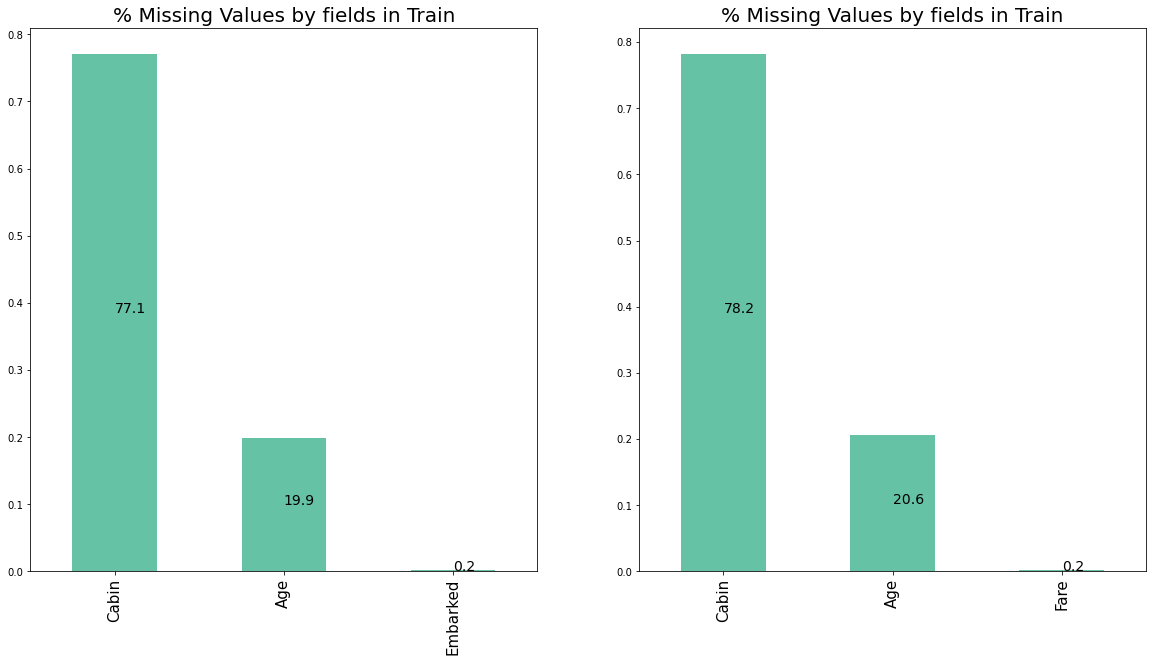

In [10]:
#train
try :
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    y=train.isna().sum().loc[(train.isna().sum().sort_values(ascending=False))>0].apply(lambda x:x/len(train)).sort_values(ascending=False)
    y.plot(kind='bar')
    title = '% Missing Values by fields in Train'
    ax=y.plot(kind='bar',title=title)
    plt.title(title,fontsize=20)
    plt.xticks(fontsize=15)
    for i in range(0,len(y)):
        ax.annotate(round(y.iloc[i,]*100,1), xy =(i, y.iloc[i]/2),size=14)

    plt.subplot(1,2,2)
    y=test.isna().sum().loc[(test.isna().sum().sort_values(ascending=False))>0].apply(lambda x:x/len(test)).sort_values(ascending=False)
    y.plot(kind='bar')
    title = '% Missing Values by fields in Train'
    ax=y.plot(kind='bar',title=title)
    for i in range(0,len(y)):
        ax.annotate(round(y.iloc[i,]*100,1), xy =(i, y.iloc[i]/2),size=14)
except:
    print('')
plt.title(title,fontsize=20)
plt.xticks(fontsize=15)
plt.plot();

## categorical feature analysis :

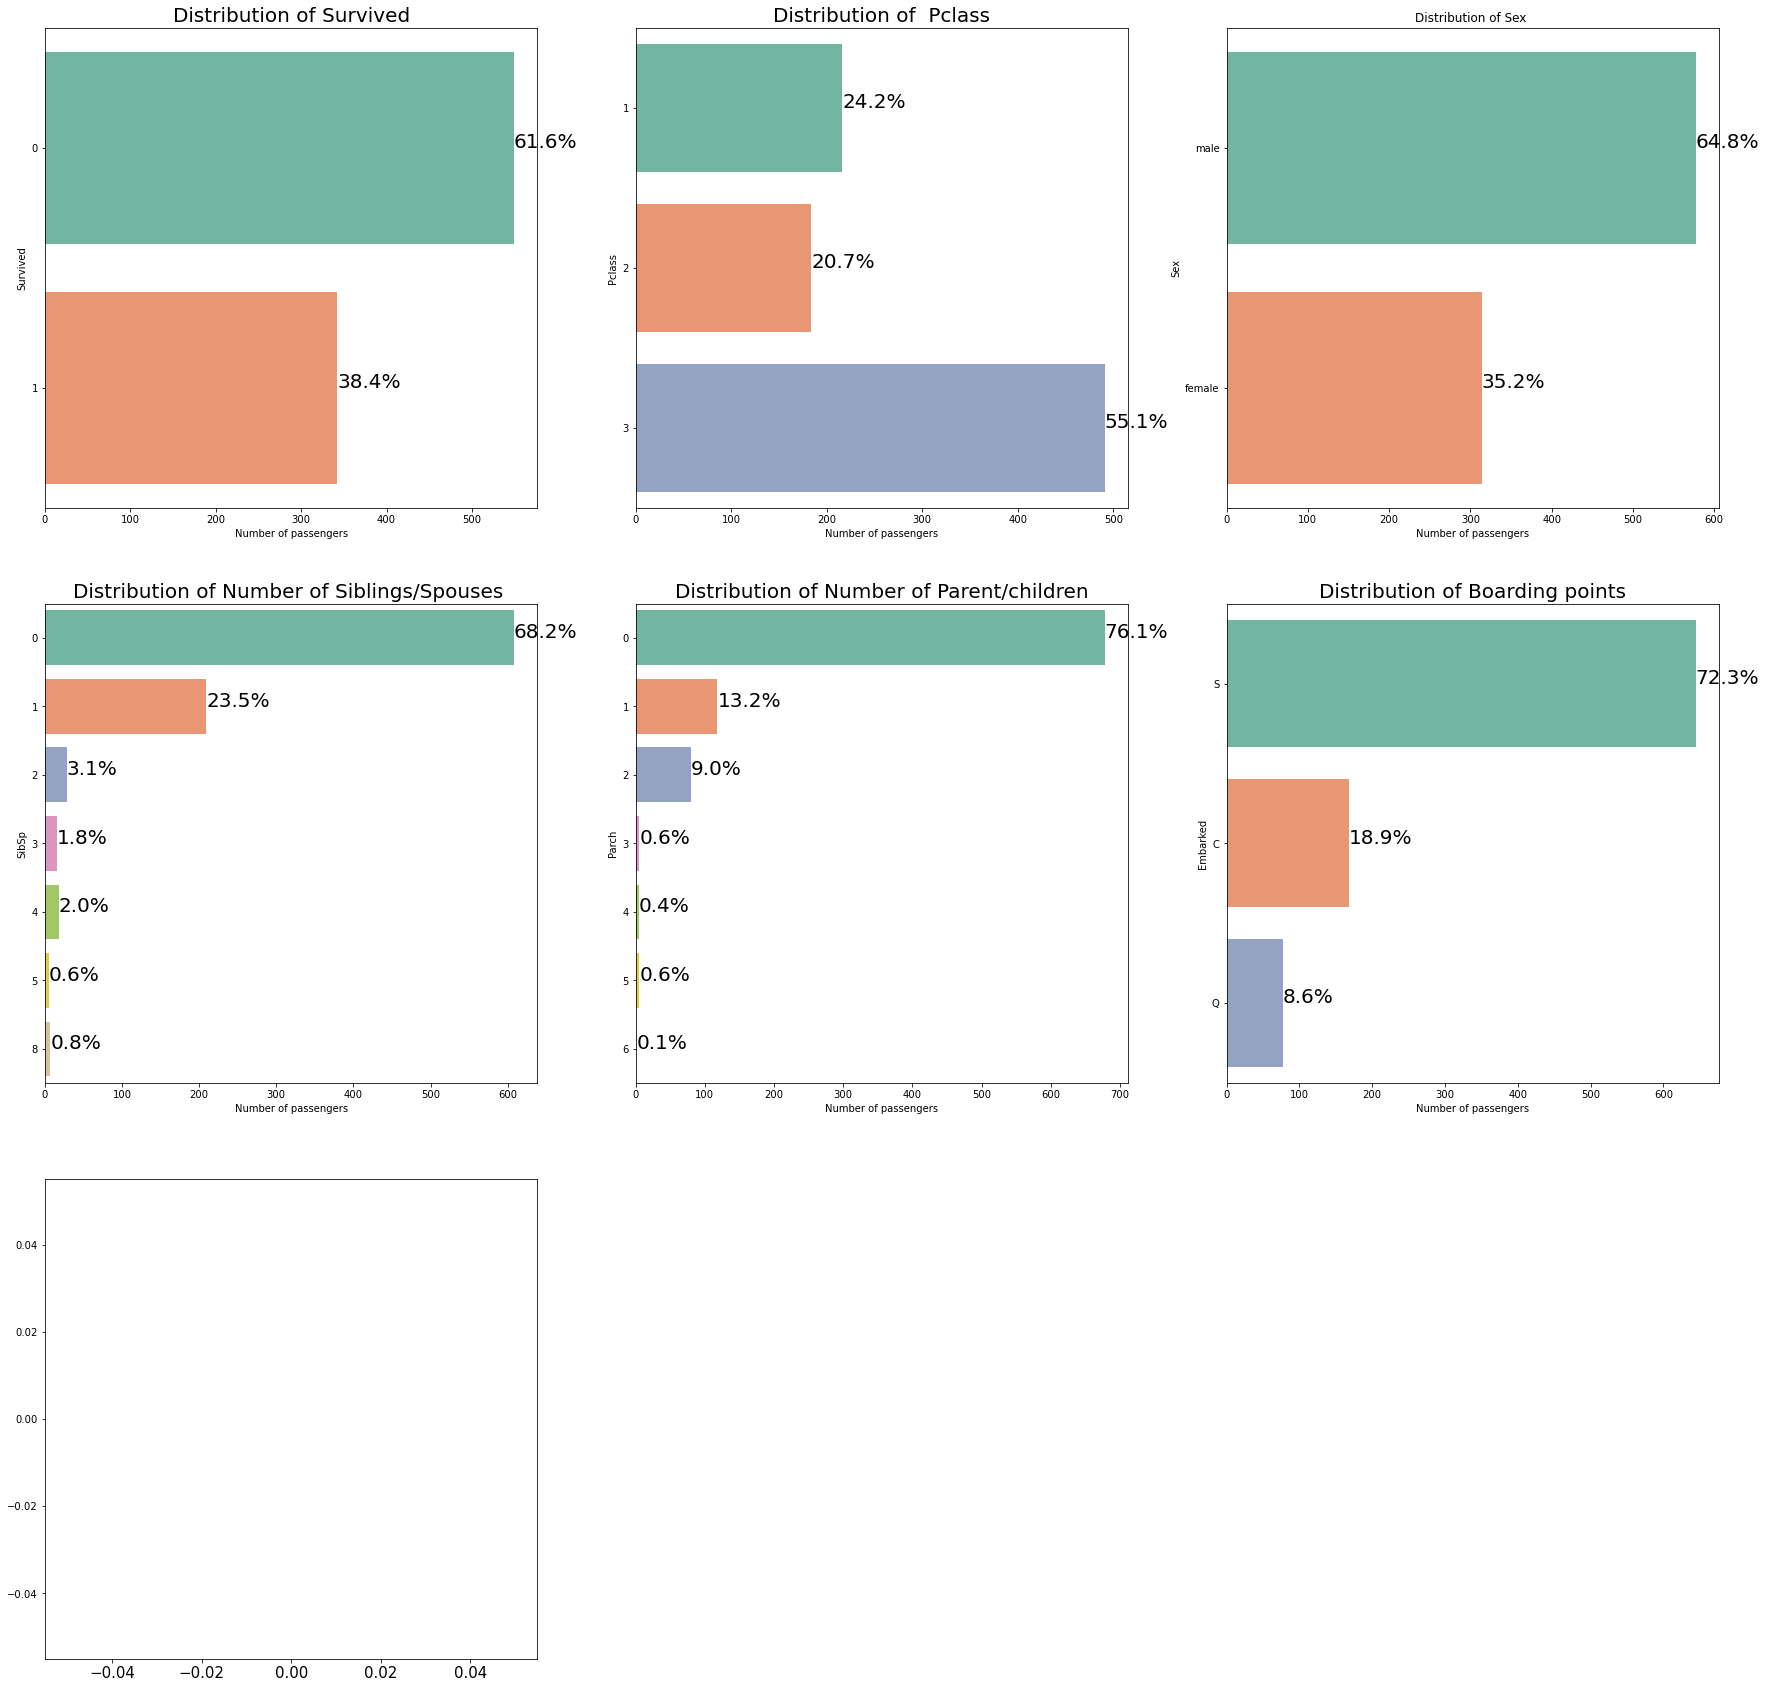

In [11]:
try:
    plt.figure(figsize=(30,30))
    plt.subplot(3,3,1)
    ax = sns.countplot(y=train.Survived, data=train)
    plt.title('Distribution of Survived',fontsize=20)
    plt.xlabel('Number of passengers')
    total = len(train['Survived'])
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y),fontsize=20)


    plt.subplot(3,3,2)
    ax = sns.countplot(y=train.Pclass, data=train)
    plt.title('Distribution of  Pclass',fontsize=20)
    plt.xlabel('Number of passengers')

    total = len(train['Pclass'])
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y),fontsize=20)

    plt.subplot(3,3,3)     
    ax = sns.countplot(y=train.Sex, data=train)
    plt.title('Distribution of Sex ')
    plt.xlabel('Number of passengers')

    total = len(train['Sex'])
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y),fontsize=20)

    plt.subplot(3,3,4)   
    ax = sns.countplot(y=train.SibSp, data=train)
    plt.title('Distribution of Number of Siblings/Spouses ',fontsize=20)
    plt.xlabel('Number of passengers')

    total = len(train['SibSp'])
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y),fontsize=20)

    plt.subplot(3,3,5)        
    ax = sns.countplot(y=train.Parch, data=train)
    plt.title('Distribution of Number of Parent/children',fontsize=20)
    plt.xlabel('Number of passengers')

    total = len(train['Parch'])
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y),fontsize=20)

    plt.subplot(3,3,6)  
    ax = sns.countplot(y=train.Embarked, data=train)
    plt.title('Distribution of Boarding points',fontsize=20)
    plt.xlabel('Number of passengers')

    total = len(train['Embarked'])
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y),fontsize=20)

    plt.subplot(3,3,7)        
    ax = sns.countplot(y=train_v2.Cabin_flag, data=train)
    plt.title('Distribution Cabin/Non-cabin passengers',fontsize=20)
    plt.xlabel('Number of passengers')

    total = len(train_v2['Cabin_flag'])
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y),fontsize=20)

except:
    print('')

plt.xticks(fontsize=15)
plt.plot();

In [12]:
train_v2=train.copy()
test_v2=test.copy()

In [13]:
'''cabin flag'''
train_v2['Cabin_flag']=np.where(train_v2.Cabin.isnull(),0,1)
test_v2['Cabin_flag']=np.where(test_v2.Cabin.isnull(),0,1)

'cabin flag'

In [14]:
"""Gender flag"""
# train_v2['Gender']=np.where(train_v2.Sex=='male',1,0)
# test_v2['Gender']=np.where(test_v2.Sex=='male',1,0)


'Gender flag'

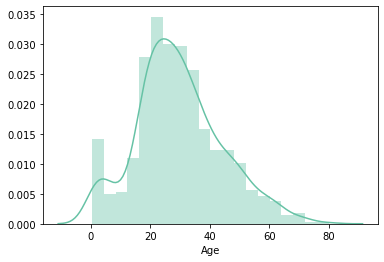

In [15]:
sns.distplot(train.Age)

## Categorical variables vs Survived

In [16]:
train['Cabin_flag']=np.where(train.Cabin.isnull(),0,1)

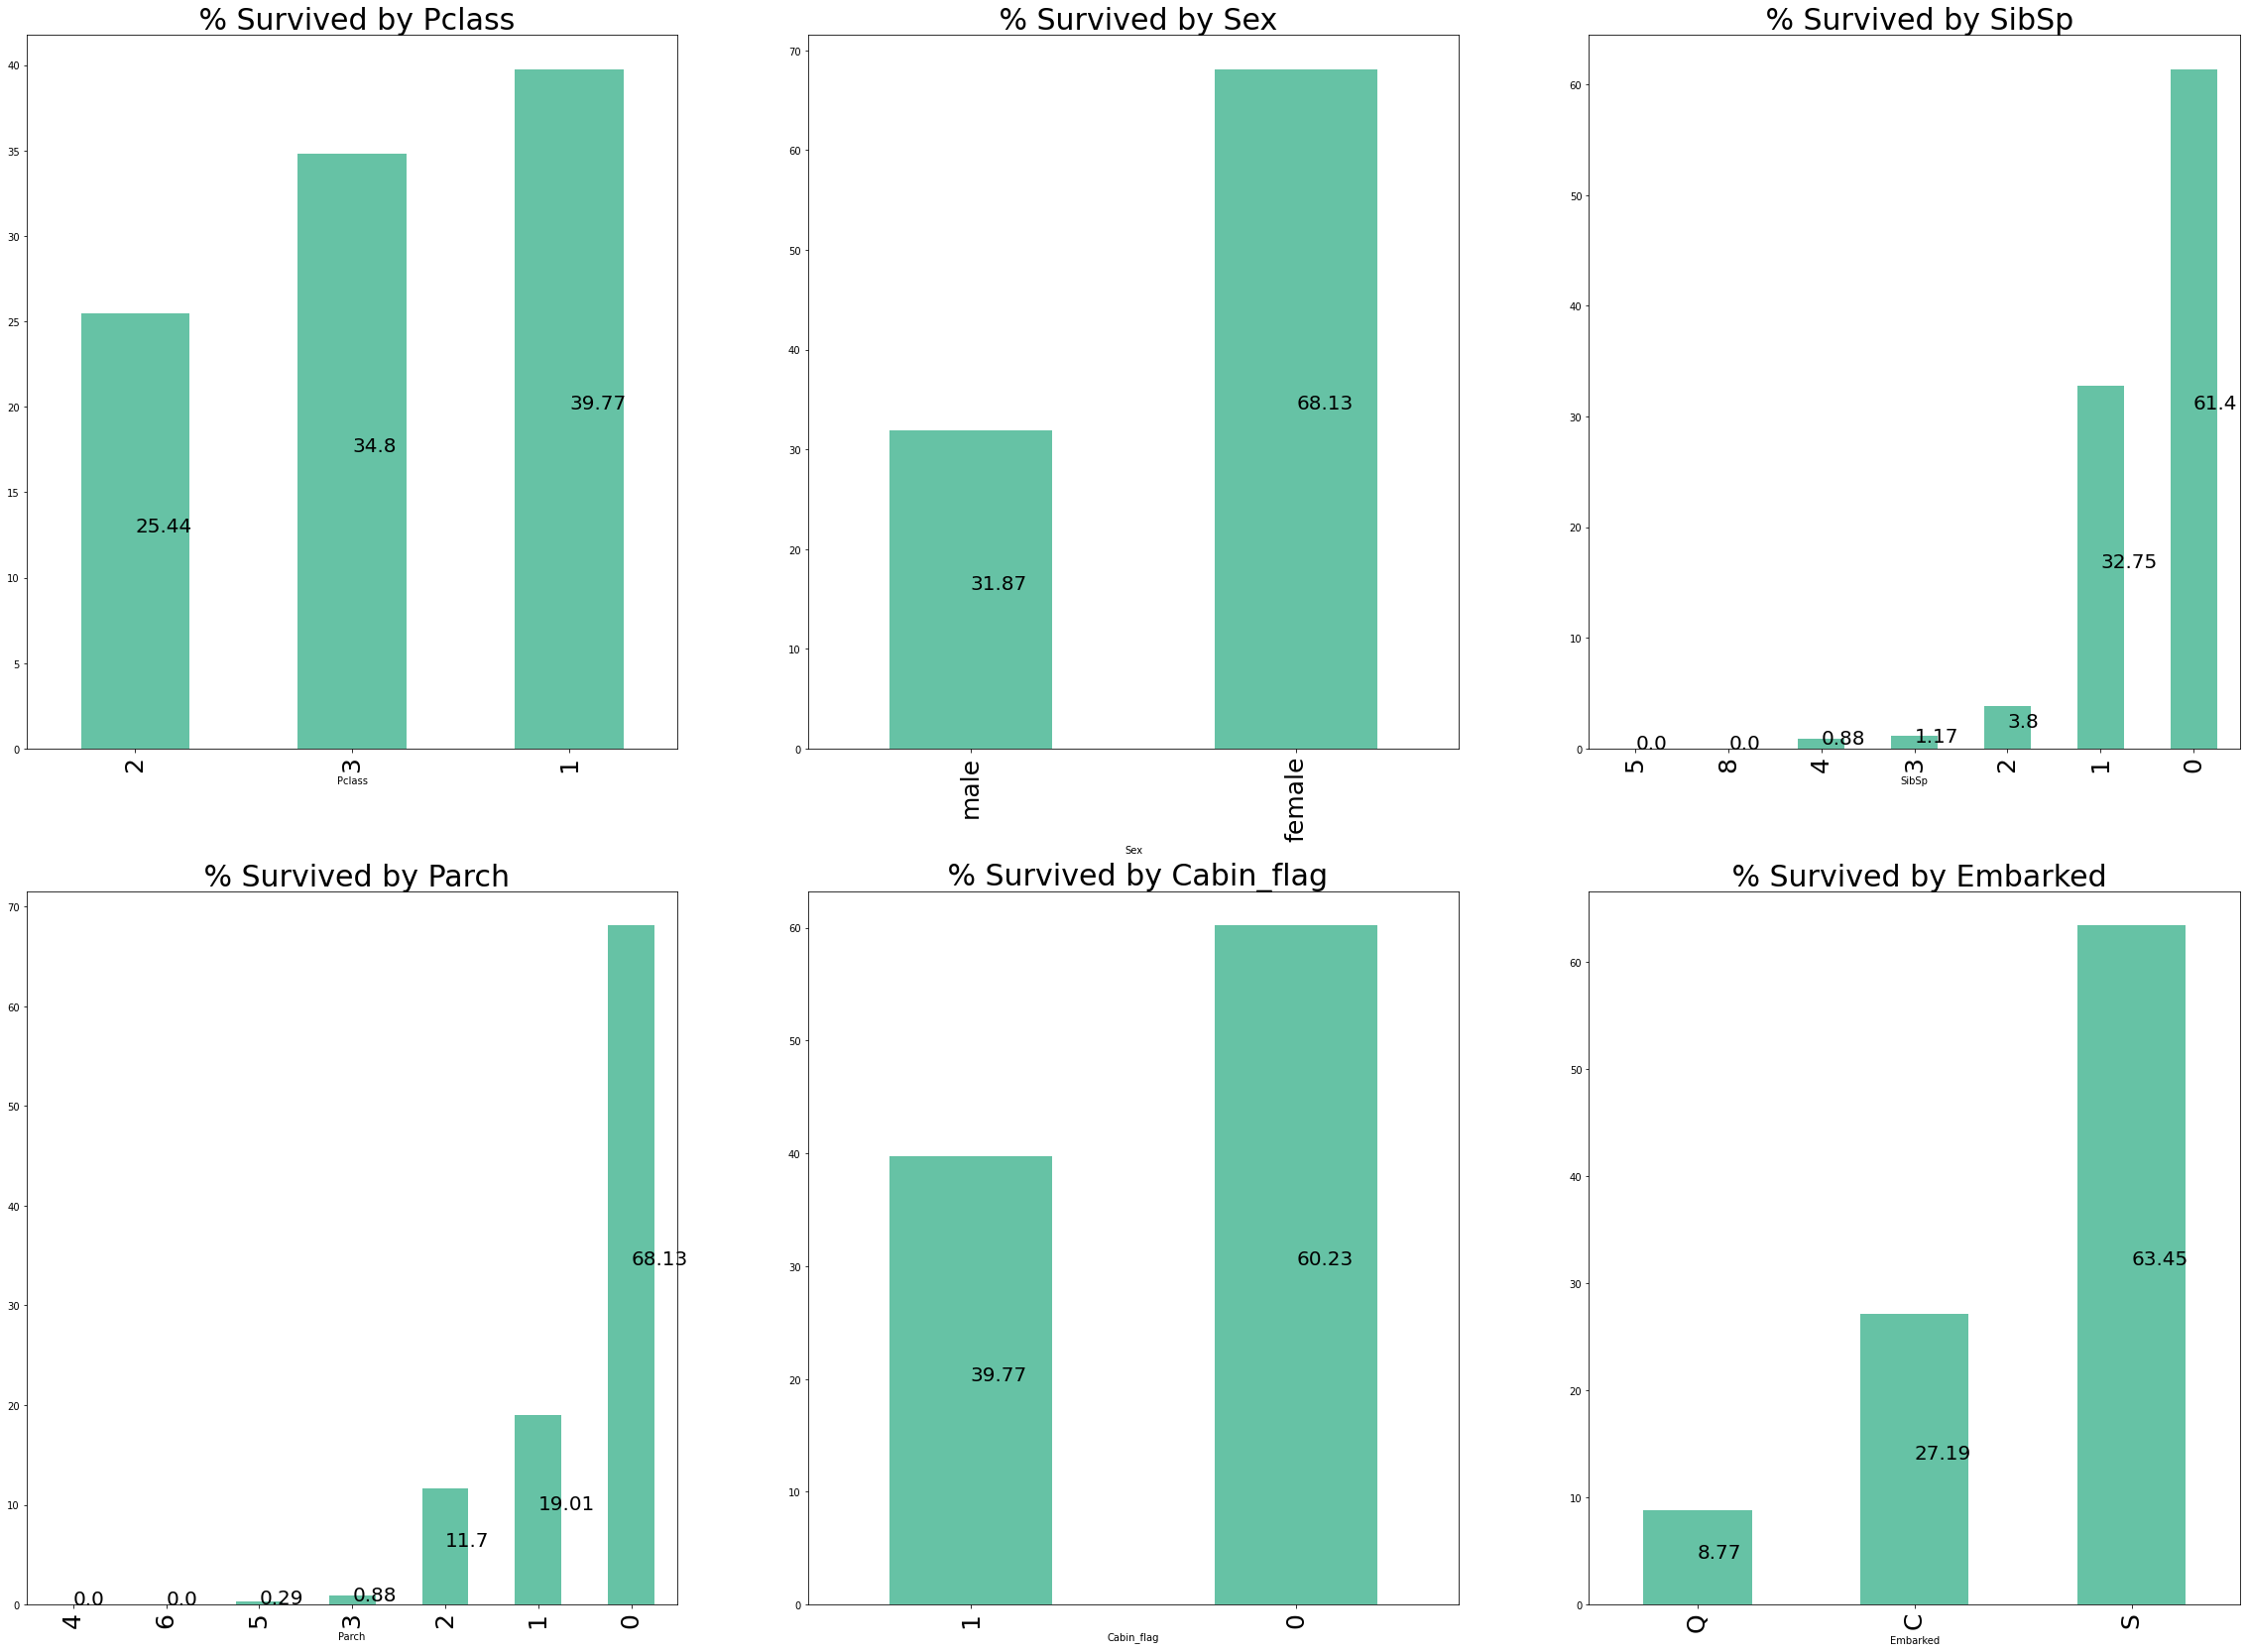

In [17]:
y_vars=['Survived']
x_vars=['Pclass', 'Sex',  'SibSp',  'Parch', 'Cabin_flag', 'Embarked']

"""Plotting after combining cats"""
try:

    figsize=(40,45) #dynamic figure size
    plt.figure(figsize=figsize);


    for j in y_vars:
        for i in x_vars:
            title= ' % '+ j+' by '+i
            plt.subplot(round(len(x_vars)/2),3,x_vars.index(i)+1)
            y=round((train.groupby(i)[j].sum().round().astype(int).sort_values()/sum(train.Survived))*100,2)
            ax=y.plot(kind='bar',title=title)
            plt.title(title,fontsize=30)
            plt.xticks(fontsize=25)
            for k in range(0,len(y)):
                ax.annotate(y.iloc[k], xy =(k, y.iloc[k]/2),size=20);
    
except:
    print('')
plt.title(title,fontsize=30)
plt.xticks(fontsize=25)
plt.plot();

### Further Analysis on Categorical variables

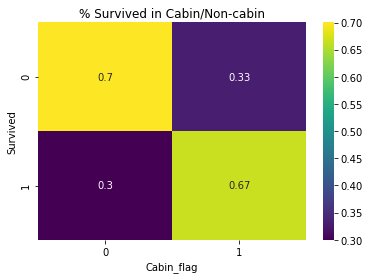

In [18]:

pd.crosstab(train_v2.Survived,train_v2.Cabin_flag,normalize='index')
sns.heatmap(pd.crosstab(train_v2.Survived,train_v2.Cabin_flag,normalize='columns'),annot=True,cmap='viridis')
plt.title('% Survived in Cabin/Non-cabin');

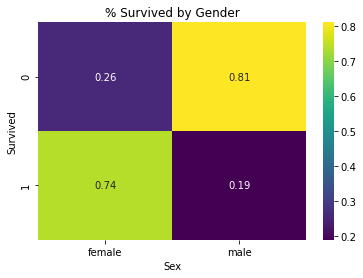

In [19]:
sns.heatmap(pd.crosstab(train_v2.Survived,train_v2.Sex,normalize='columns'),annot=True,cmap='viridis')
plt.title('% Survived by Gender');


### Numerical Variable Analysis - CORRELATION PLOT

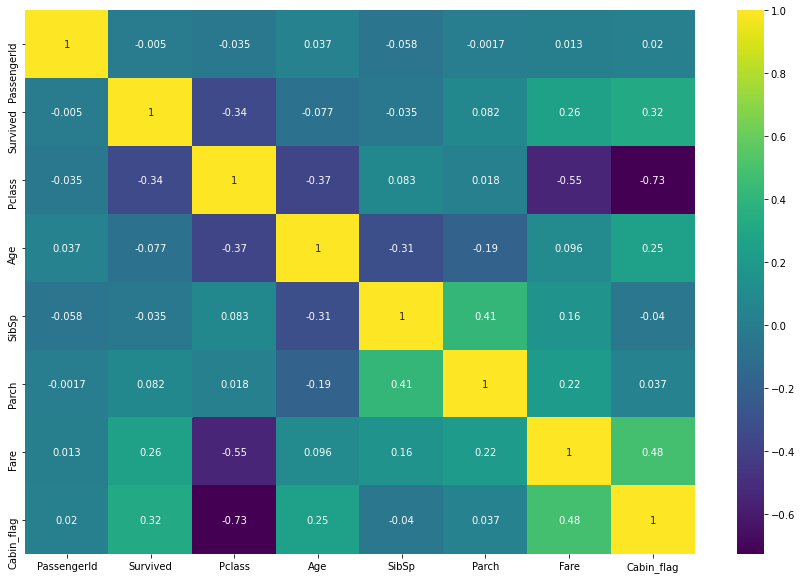

In [20]:
x= train_v2.select_dtypes(include=[np.number])#to check only numeric columns
x.corr() 

corr = train_v2.corr()
plt.figure(figsize=(15,10)) 
ax=sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap='viridis', annot=True)
plt.show()

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);


#High negative correl between pclass and cabin means that a passenger in 1st class facility had cabin --we can chose one out of them 
#high neg correl btween plcass and fare, good class(1st) ->good price ->we can chose one
#out of the above 3 cabin flag makes the most sense to keep because it is has better correl with the survived passengers
#strong neg correl in gender and survived indicates that more number of females survived

## Data Imputation 

In [21]:
'''
kNN Imputation for numerical missing features
'''
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=4, weights='distance')

'\nkNN Imputation for numerical missing features\n'

In [22]:
#Numeric columns 

num_columns=list(train_v2.drop(columns=['PassengerId','Survived']).select_dtypes(include=np.number).columns)
# df_numeric=train_v2[num_columns]


In [23]:
train_v3=pd.DataFrame(imputer.fit_transform(train_v2[num_columns])) 
test_v3=pd.DataFrame(imputer.fit_transform(test_v2[num_columns])) 

In [25]:
train_v3.columns

RangeIndex(start=0, stop=6, step=1)

In [26]:
#Applying imputation and storing results in df :

train_v3.columns=train_v2[num_columns].columns
test_v3.columns=test_v2[num_columns].columns

In [27]:
train_v2['Age_']=train_v3['Age']
test_v2['Age_']=test_v3['Age']
#fare
test_v2['Fare_']=test_v3['Fare']

In [32]:
# dropping other cols :

train_v4=train_v2.drop(columns=['Age','Cabin'])
test_v4=test_v2.drop(columns=['Age','Cabin','Fare'])

In [29]:
# doing a median and mode imputation for the remaining values

train_v4.Embarked.fillna(train_v4.Embarked.mode()[0],inplace=True)

In [33]:
train_v4['Age_']=round(train_v4['Age_'],0)
test_v4['Age_']=round(test_v4['Age_'],0)

Since, Pclass is a categorical variable and is  A proxy for socio-economic status (SES). We substitute the values by cateogries : 1 - high, 2- medium, 3-low 

In [34]:
train_v4['Pclass']=np.where(train_v4['Pclass']==1,'high',np.where(train_v4['Pclass']==2,'med','low'))
test_v4['Pclass']=np.where(test_v4['Pclass']==1,'high',np.where(test_v4['Pclass']==2,'med','low'))

In [35]:
train_v5=train_v4.drop(columns=['Name','Ticket'])
test_v5=test_v4.drop(columns=['Name','Ticket'])

In [36]:
train_v5=pd.get_dummies(train_v5,drop_first=True)
test_v5=pd.get_dummies(test_v5,drop_first=True)

In [37]:
test_v5.head()

,PassengerId,SibSp,Parch,Cabin_flag,Age_,Fare_,Pclass_low,Pclass_med,Sex_male,Embarked_Q,Embarked_S
0,892,0,0,0,34.0,7.8292,1,0,1,1,0
1,893,1,0,0,47.0,7.0000,1,0,0,0,1
2,894,0,0,0,62.0,9.6875,0,1,1,1,0
3,895,0,0,0,27.0,8.6625,1,0,1,0,1
4,896,1,1,0,22.0,12.2875,1,0,0,0,1


In [39]:
### Scaling

from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
# scaler = MinMaxScaler()
scaler=MinMaxScaler()

In [49]:
train_v5.head()

,PassengerId,Survived,SibSp,Parch,Fare,Cabin_flag,Age_,Pclass_low,Pclass_med,Sex_male,Embarked_Q,Embarked_S,Age_scaled
0,1,0,1,0,7.2500,0,22.0,1,0,1,0,1,0.2750
1,2,1,1,0,71.2833,1,38.0,0,0,0,0,0,0.4750
2,3,1,0,0,7.9250,0,26.0,1,0,0,0,1,0.3250
3,4,1,1,0,53.1000,1,35.0,0,0,0,0,1,0.4375
4,5,0,0,0,8.0500,0,35.0,1,0,1,0,1,0.4375


In [50]:
# Apply scaler() to age and fare


train_v5['Age_scaled'] = scaler.fit_transform(train_v5[['Age_']])
test_v5['Age_scaled'] = scaler.fit_transform(test_v5[['Age_']])

train_v5['Fare_scaled'] = scaler.fit_transform(train_v5[['Fare']])
test_v5['Fare_scaled'] = scaler.fit_transform(test_v5[['Fare_']])
# df_filtered_v3.columns=list(df_filtered_v2.columns)

# df_filtered_v3.head()

In [52]:
test_v5.head()

,PassengerId,SibSp,Parch,Cabin_flag,Age_,Fare_,Pclass_low,Pclass_med,Sex_male,Embarked_Q,Embarked_S,Age_scaled,Fare_scaled
0,892,0,0,0,34.0,7.8292,1,0,1,1,0,0.447368,0.015282
1,893,1,0,0,47.0,7.0000,1,0,0,0,1,0.618421,0.013663
2,894,0,0,0,62.0,9.6875,0,1,1,1,0,0.815789,0.018909
3,895,0,0,0,27.0,8.6625,1,0,1,0,1,0.355263,0.016908
4,896,1,1,0,22.0,12.2875,1,0,0,0,1,0.289474,0.023984


## Data Export

In [54]:
train_v5.to_csv('train_prep.csv',index=False)
test_v5.to_csv('test_prep.csv',index=False)

### Model Validation

In [305]:
X=train_v5[list(set(train_v5.columns)-{'PassengerId','Survived'})]
Y=train_v5['Survived']

In [325]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 42,stratify=Y)

In [326]:

# y_train=train_v5['Survived']
# X_train=train_v5[list(set(train_v5.columns)-{'PassengerId','Survived'})]
# X_test=test_v5[list(set(test_v5.columns)-{'PassengerId'})]
# X_train=

In [327]:
import statsmodels.api as sm
lg_reg_model = sm.GLM(y_train, sm.add_constant(X_train),family=sm.families.Binomial()).fit() # add const and famili bonom???


In [328]:
lg_reg_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Results: Generalized linear model
===============================================================
Model:              GLM              AIC:            632.2636  
Link Function:      logit            BIC:            -3993.9590
Dependent Variable: Survived         Log-Likelihood: -305.13   
Date:               2021-01-13 02:20 LL-Null:        -473.99   
No. Observations:   712              Deviance:       610.26    
Df Model:           10               Pearson chi2:   730.      
Df Residuals:       701              Scale:          1.0000    
Method:             IRLS                                       
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
const           3.1940   0.6115   5.2233 0.0000  1.9955  4.3924
SibSp          -0.2379   0.1250  -1.9036 0.0570 -0.4828  0.0070
Fare            0.0018   0.0030   0.6212 0.5345 -0.0040  0.0076
Sex_male       -2.6610   0.2262 -11.7637 0.0000 -3.1044 -2.2177
Pclass_med     -0.2710   0.4408  -0.6148 0.5387 -1.1349  0.5929
Cabin_flag      1.1463   0.3696   3.1012 0.0019  0.4218  1.8708
Embarked_Q      0.3702   0.4449   0.8320 0.4054 -0.5018  1.2422
Parch          -0.1176   0.1283  -0.9164 0.3595 -0.3691  0.1339
Age_           -0.0378   0.0087  -4.3443 0.0000 -0.0548 -0.0207
Pclass_low     -1.4868   0.4612  -3.2235 0.0013 -2.3907 -0.5828
Embarked_S     -0.4340   0.2712  -1.6006 0.1095 -0.9655  0.0975
===============================================================

"""

In [329]:
def get_significant_vars (modelobject):
    var_p_vals_df = pd.DataFrame(modelobject.pvalues)
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return var_p_vals_df[var_p_vals_df.pvals <= 0.05][['pvals']]


significant_vars = get_significant_vars(lg_reg_model)
significant_vars

,pvals
const,1.757520e-07
Sex_male,6.006068e-32
Cabin_flag,1.927630e-03
Age_,1.396913e-05
Pclass_low,1.266193e-03


In [334]:
sig_var=['SibSp','Sex_male','Cabin_flag','Age_','Pclass_low']
X_train=X_train[sig_var]
X_test=X_test[sig_var]

In [331]:
import statsmodels.api as sm
lg_reg_model2 = sm.GLM(y_train, sm.add_constant(X_train),family=sm.families.Binomial()).fit() # add const and famili bonom???
lg_reg_model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Results: Generalized linear model
===============================================================
Model:              GLM              AIC:            632.2889  
Link Function:      logit            BIC:            -4016.7741
Dependent Variable: Survived         Log-Likelihood: -310.14   
Date:               2021-01-13 02:20 LL-Null:        -473.99   
No. Observations:   712              Deviance:       620.29    
Df Model:           5                Pearson chi2:   735.      
Df Residuals:       706              Scale:          1.0000    
Method:             IRLS                                       
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
const           2.6137   0.3735   6.9975 0.0000  1.8816  3.3458
SibSp          -0.2893   0.1208  -2.3954 0.0166 -0.5260 -0.0526
Sex_male       -2.6811   0.2167 -12.3724 0.0000 -3.1058 -2.2563
Cabin_flag      1.4174   0.2770   5.1168 0.0000  0.8745  1.9604
Age_           -0.0353   0.0083  -4.2531 0.0000 -0.0516 -0.0191
Pclass_low     -1.2081   0.2430  -4.9711 0.0000 -1.6844 -0.7318
===============================================================

"""

In [304]:
# ### Only significant variables included in the model

# pass_formula = 'Survived ~ C(Pclass)+C(Sex)  +SibSp  +Cabin_flag+Age_'


# lg_reg_model2 = smf.glm(formula=pass_formula, data=train_v4, family=sm.families.Binomial()).fit()
# lg_reg_model2.summary2()

In [335]:
"""PREDICTED CLASS WITH ACTUAL CLASS"""
def get_predictions ( test_class, model, test_data ):
    y_pred_df = pd.DataFrame( { 'actual': test_class,
                               'predicted_prob': model.get_prediction(sm.add_constant(test_data)).predicted_mean})
    return y_pred_df

'PREDICTED CLASS WITH ACTUAL CLASS'

In [336]:
'PREDICTED CLASS WITH ACTUAL CLASS'
predict_test_df = pd.DataFrame(get_predictions(y_test, lg_reg_model2,X_test))
predict_test_df.head()

'PREDICTED CLASS WITH ACTUAL CLASS'

,actual,predicted_prob
565,0,0.062850
160,0,0.055718
553,1,0.113769
860,0,0.035477
241,1,0.478750


In [342]:
#DEFAULT CUTOFF TAKEN =0.7
predict_test_df['predicted'] = predict_test_df.predicted_prob.apply(lambda x: '1' if x > 0.45 else '0')
predict_test_df[0:10]

,actual,predicted_prob,predicted
565,0,0.062850,0
160,0,0.055718,0
553,1,0.113769,0
860,0,0.035477,0
241,1,0.478750,1
559,1,0.461150,1
387,1,0.792772,1
536,0,0.440310,0
698,0,0.338375,0
99,0,0.173935,0


In [343]:
"""CONFUSION MATRIX"""
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("The model with dummy variable coding output: ")
confusion_matrix(predict_test_df.actual, predict_test_df.predicted.astype('int'))
lg_reg_report_50 = (classification_report(y_test, predict_test_df.predicted.astype('int')))
print(lg_reg_report_50)

"""PERFORMANCE MEASUREMENT"""
def measure_performance (clasf_matrix):
    measure = pd.DataFrame({
                        'sensitivity': [round(clasf_matrix[0,0]/(clasf_matrix[0,0]+clasf_matrix[0,1]),2)], 
                        'specificity': [round(clasf_matrix[1,1]/(clasf_matrix[1,0]+clasf_matrix[1,1]),2)],
                        'recall': [round(clasf_matrix[0,0]/(clasf_matrix[0,0]+clasf_matrix[0,1]),2)],
                        'precision': [round(clasf_matrix[0,0]/(clasf_matrix[0,0]+clasf_matrix[1,0]),2)],
                        'overall_acc': [round((clasf_matrix[0,0]+clasf_matrix[1,1])/
                                              (clasf_matrix[0,0]+clasf_matrix[0,1]+clasf_matrix[1,0]+clasf_matrix[1,1]),2)]
                       })
    return measure

cm = metrics.confusion_matrix(predict_test_df.actual, predict_test_df.predicted.astype(int))

'CONFUSION MATRIX'

The model with dummy variable coding output: 


array([[93, 17],
       [17, 52]])

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.75      0.75      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



'PERFORMANCE MEASUREMENT'

In [344]:
lg_reg_metrics_df = pd.DataFrame(measure_performance(cm))
lg_reg_metrics_df

,sensitivity,specificity,recall,precision,overall_acc
0,0.85,0.75,0.85,0.85,0.81


In [347]:
"""optimal cut-off"""

lg_pred_prob_df = lg_reg_model2.predict(sm.add_constant(X_test))
n = len(X_test)

# -->since classifying someone as winning and then losing in actual would cost us a lot hence assigning double 
# penalty in this case

"""COST TABLE"""
d = {"Not-survived":(0,2), "Survived": (1,0)} 

costs = pd.DataFrame(d, index = ('Not-survived', 'Survived'))


print(costs)

'optimal cut-off'

'COST TABLE'

              Not-survived  Survived
Not-survived             0         1
Survived                 2         0


In [ ]:
X_test['']

In [351]:
def frange(start, stop, step):
     s = start
     while s < stop:
         yield s
         s += step
#creating empty vectors to store the results.
cutoff = []
P11 = [] #correct classification of positive as positive
P00 = [] #correct classification of negative as negative
P10 = [] #misclassification of positive class to negative class
P01 = [] #misclassification of negative class to positive class

for i in frange(0.00, 1, 0.05):
    predicted_y = lg_pred_prob_df.map(lambda x: 1 if x > i else 0)
    tbl = metrics.confusion_matrix(y_test, predicted_y)

    if ( i <= 1):
        j = int(20*i)
        P01.append(tbl[0,1]/(tbl[0,1] + tbl[0,0]))
        P00.append(tbl[0,0]/(tbl[0,1] + tbl[0,0]))
        P10.append(tbl[1,0]/(tbl[1,0] + tbl[1,1]))
        P11.append(tbl[1,1]/(tbl[1,0] + tbl[1,1]))
        cutoff.append(i)

d = {'cutoff':cutoff,'P10':P10,'P01': P01,'P00': P00,'P11':P11}
df_cost_table = pd.DataFrame(d, columns=['cutoff','P00','P01','P10','P11'])

df_cost_table

,cutoff,P00,P01,P10,P11
0,0.00,0.000000,1.000000,0.000000,1.000000
1,0.05,0.018182,0.981818,0.000000,1.000000
2,0.10,0.381818,0.618182,0.072464,0.927536
3,0.15,0.572727,0.427273,0.130435,0.869565
4,0.20,0.636364,0.363636,0.159420,0.840580
5,0.25,0.663636,0.336364,0.173913,0.826087
6,0.30,0.700000,0.300000,0.217391,0.782609
7,0.35,0.763636,0.236364,0.246377,0.753623
8,0.40,0.809091,0.190909,0.246377,0.753623
9,0.45,0.845455,0.154545,0.246377,0.753623


In [352]:
df_cost_table['msclaf_cost'] = df_cost_table.P01*costs.iloc[0][1]+df_cost_table.P10*costs.iloc[1][0]
df_cost_table['youden_index'] = df_cost_table.P00+df_cost_table.P11 -1
df_cost_table

,cutoff,P00,P01,P10,P11,msclaf_cost,youden_index
0,0.00,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
1,0.05,0.018182,0.981818,0.000000,1.000000,0.981818,0.018182
2,0.10,0.381818,0.618182,0.072464,0.927536,0.763109,0.309354
3,0.15,0.572727,0.427273,0.130435,0.869565,0.688142,0.442292
4,0.20,0.636364,0.363636,0.159420,0.840580,0.682477,0.476943
5,0.25,0.663636,0.336364,0.173913,0.826087,0.684190,0.489723
6,0.30,0.700000,0.300000,0.217391,0.782609,0.734783,0.482609
7,0.35,0.763636,0.236364,0.246377,0.753623,0.729117,0.517260
8,0.40,0.809091,0.190909,0.246377,0.753623,0.683663,0.562714
9,0.45,0.845455,0.154545,0.246377,0.753623,0.647299,0.599078


Cutoff value according to max Youdens index :  [0.45]


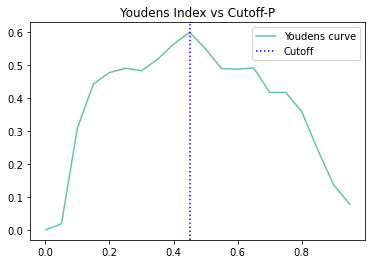

In [354]:
"""MAX YOUDENS INDEX - CUTOFF"""
max_youden_cutoff=df_cost_table.loc[df_cost_table.youden_index==df_cost_table.youden_index.max()]['cutoff'].values

plt.plot(df_cost_table.cutoff,df_cost_table.youden_index,label='Youdens curve')
plt.title('Youdens Index vs Cutoff-P')
plt.axvline(max_youden_cutoff,label='Cutoff',color='b',ls=':')
plt.legend()
print('Cutoff value according to max Youdens index : ',max_youden_cutoff);

Cutoff value according to min. Miscalc Penalty  :  [0.45]


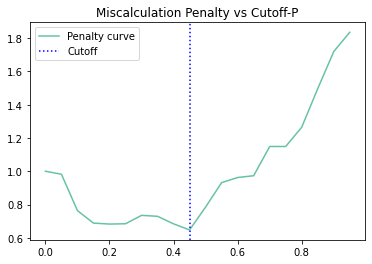

In [355]:
"""MIN PENALTY - CUTOFF"""
min_cost_cutoff=df_cost_table.loc[df_cost_table.msclaf_cost==df_cost_table.msclaf_cost.min()]['cutoff'].values

plt.plot(df_cost_table.cutoff,df_cost_table.msclaf_cost,label='Penalty curve')
plt.title('Miscalculation Penalty vs Cutoff-P')
plt.axvline(min_cost_cutoff,label='Cutoff',color='b',ls=':')
plt.legend()
print('Cutoff value according to min. Miscalc Penalty  : ',min_cost_cutoff);

'ROC CURVE AND OPTIMAL CUTOFF'

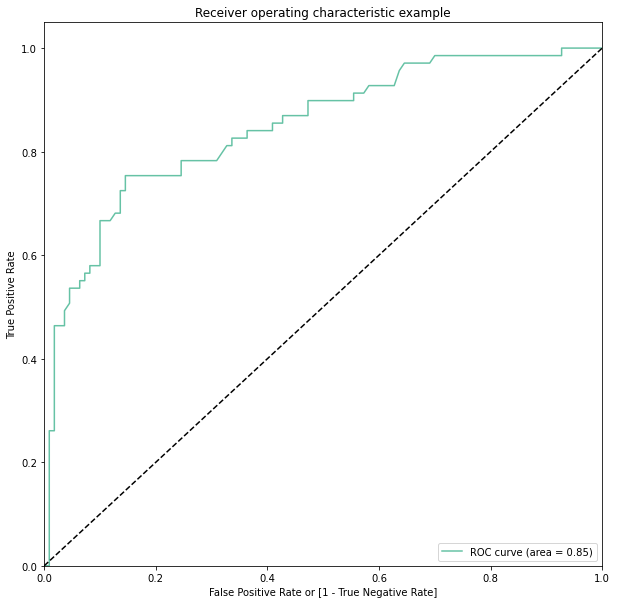

0.85

In [360]:
""'ROC CURVE AND OPTIMAL CUTOFF'""

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(10, 10))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

fpr, tpr, thresholds = draw_roc(predict_test_df.actual, predict_test_df.predicted_prob )
auc_score = metrics.roc_auc_score( predict_test_df.actual, predict_test_df.predicted_prob  )
round( float( auc_score ), 2 )

## Actual Predictions

In [363]:
## Combining the data 
# taking signifigant variables only
y_train=train_v5['Survived']
X_train=train_v5[sig_var]
X_test=test_v5[sig_var]

In [364]:
import statsmodels.api as sm
lg_reg_model2 = sm.GLM(y_train, sm.add_constant(X_train),family=sm.families.Binomial()).fit() # add const and famili bonom???
lg_reg_model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Results: Generalized linear model
===============================================================
Model:              GLM              AIC:            798.5362  
Link Function:      logit            BIC:            -5224.6886
Dependent Variable: Survived         Log-Likelihood: -393.27   
Date:               2021-01-13 02:44 LL-Null:        -593.33   
No. Observations:   891              Deviance:       786.54    
Df Model:           5                Pearson chi2:   929.      
Df Residuals:       885              Scale:          1.0000    
Method:             IRLS                                       
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
const           2.7405   0.3368   8.1365 0.0000  2.0803  3.4006
SibSp          -0.3563   0.1068  -3.3357 0.0009 -0.5657 -0.1470
Sex_male       -2.6920   0.1944 -13.8476 0.0000 -3.0731 -2.3110
Cabin_flag      1.2589   0.2453   5.1322 0.0000  0.7781  1.7397
Age_           -0.0353   0.0075  -4.7201 0.0000 -0.0500 -0.0207
Pclass_low     -1.2659   0.2165  -5.8468 0.0000 -1.6903 -0.8416
===============================================================

"""

In [304]:
# ### Only significant variables included in the model

# pass_formula = 'Survived ~ C(Pclass)+C(Sex)  +SibSp  +Cabin_flag+Age_'


# lg_reg_model2 = smf.glm(formula=pass_formula, data=train_v4, family=sm.families.Binomial()).fit()
# lg_reg_model2.summary2()

In [365]:
"""PREDICTED CLASS WITH ACTUAL CLASS"""
def get_predictions ( test_class, model, test_data ):
    y_pred_df = pd.DataFrame( { 'actual': test_class,
                               'predicted_prob': model.get_prediction(sm.add_constant(test_data)).predicted_mean})
    return y_pred_df

'PREDICTED CLASS WITH ACTUAL CLASS'

In [370]:
'PREDICTED CLASS WITH ACTUAL CLASS'
predict_test_df = pd.DataFrame(get_predictions(y_test.Survived, lg_reg_model2,X_test))
predict_test_df.head()

'PREDICTED CLASS WITH ACTUAL CLASS'

,actual,predicted_prob
0,0,0.081767
1,1,0.367706
2,0,0.105107
3,0,0.102357
4,1,0.584446


In [371]:
#DEFAULT CUTOFF TAKEN =0.7
predict_test_df['predicted'] = predict_test_df.predicted_prob.apply(lambda x: '1' if x > 0.45 else '0')
predict_test_df[0:10]

,actual,predicted_prob,predicted
0,0,0.081767,0
1,1,0.367706,0
2,0,0.105107,0
3,0,0.102357,0
4,1,0.584446,1
5,0,0.152894,0
6,1,0.602229,1
7,0,0.226822,0
8,1,0.698183,1
9,0,0.064648,0


In [378]:
final_predictions=

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [375]:
X_test.head()

,SibSp,Sex_male,Cabin_flag,Age_,Pclass_low
0,0,1,0,34.0,1
1,1,0,0,47.0,1
2,0,1,0,62.0,0
3,0,1,0,27.0,1
4,1,0,0,22.0,1


In [379]:
y_test['Predicted']=predict_test_df.predicted

In [383]:
final_prediction_logistic=y_test[['PassengerId','Predicted']].copy()
final_prediction_logistic.columns=['PassengerId','Survived']

In [387]:
final_prediction_logistic.to_csv('logistic_regression_optimal_cutoff.csv',index=False)

### Random forest Classifier

In [391]:
y_train=train_v5['Survived']
X_train=train_v5[list(set(train_v5.columns)-{'PassengerId','Survived'})]
X_test=test_v5[list(set(test_v5.columns)-{'PassengerId'})]

In [392]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

RandomForestClassifier()

In [393]:
final_prediction_logistic['Survived']=y_pred

In [394]:
final_prediction_logistic.to_csv('Predictions_RF.csv',index=False)

In [397]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

Age_          0.266135
Sex_male      0.255665
Fare          0.240606
Pclass_low    0.062194
Cabin_flag    0.047144
SibSp         0.046174
Parch         0.035059
Embarked_S    0.024128
Pclass_med    0.014155
Embarked_Q    0.008740
dtype: float64

In [ ]:
##predicting using important features only :


In [398]:
y_train=train_v5['Survived']
X_train=train_v5[list(set(train_v5.columns)-{'PassengerId','Survived','Embarked_Q','Pclass_med','Embarked_S','Parch'})]
X_test=test_v5[list(set(test_v5.columns)-{'PassengerId','Embarked_Q','Pclass_med','Embarked_S','Parch'})]

In [399]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

RandomForestClassifier()

In [400]:
final_prediction_logistic['Survived']=y_pred

In [401]:
final_prediction_logistic.to_csv('Predictions_RF2.csv',index=False)

### Decision trees

In [402]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [403]:
y_train=train_v5['Survived']
X_train=train_v5[list(set(train_v5.columns)-{'PassengerId','Survived'})]
X_test=test_v5[list(set(test_v5.columns)-{'PassengerId'})]

In [404]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [405]:
final_prediction_logistic['Survived']=y_pred

In [406]:
final_prediction_logistic.to_csv('Predictions_DT.csv',index=False)

In [410]:
# !pip install graphviz

!pip install pydotplus



     |████████████████████████████████| 278 kB 250 kB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=c1f42bb50926d7c0fb07fd5a1a81ac68e2df5f24680af9bc7ad8d8c646ffe14f
  Stored in directory: /Users/nramrakh/Library/Caches/pip/wheels/fe/cd/78/a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus


In [412]:
# pip install sklearn.externals.six

ERROR: Could not find a version that satisfies the requirement sklearn.externals.six (from versions: none)
ERROR: No matching distribution found for sklearn.externals.six
Note: you may need to restart the kernel to use updated packages.


In [411]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

ModuleNotFoundError: No module named 'sklearn.externals.six'

In [152]:
# splitting the data to train and Validation:

y= train_v2[['Survived']]
X= train_v2[[ 'SibSp','Parch', 'Fare', 'EM_flag', 'Cabin_flag', 'Gender']] #removed age because of null values in 18% of the data..


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(534, 6)
(534, 1)
(357, 6)
(357, 1)


In [153]:
"""Logistic Regression Model Fitting"""
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#Predicting the test set results and calculating the accuracy
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

'Logistic Regression Model Fitting'

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

Accuracy of logistic regression classifier on test set: 0.81


In [154]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[203  24]
 [ 43  87]]


In [155]:
"""actual test data prediction"""

X_train=train_v2[[ 'SibSp','Parch', 'Fare', 'EM_flag', 'Cabin_flag', 'Gender']]
X_test=test_v2[[ 'SibSp','Parch', 'Fare', 'EM_flag', 'Cabin_flag', 'Gender']]
y_train= train_v2[['Survived']]

'actual test data prediction'

In [156]:
"""Logistic Regression Model Fitting"""
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#Predicting the test set results and calculating the accuracy
y_pred = logreg.predict(X_test)

'Logistic Regression Model Fitting'

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [157]:
test_v2.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_flag', 'Gender',
       'EM_flag'],
      dtype='object')

In [135]:
Output=test_v2[['PassengerId']].copy()
Output['Survived']=pd.DataFrame(y_pred)


In [137]:
pd.DataFrame(Output).to_csv('/personal/Python Projects/Titanic/data/Predicted_log_v1.csv', index=False)